In [1]:
import numpy as np
import pandas as pd

import bootcamp_utils
import altair as alt

In [13]:
import scipy.special

In [6]:
df=pd.read_csv('data/retina_spikes.csv',comment='#')
df=df.iloc[:1000,:]  # truncate

df.head()

,t (ms),V (uV)
0,703.96,4.79
1,704.00,-0.63
2,704.04,5.83
3,704.08,0.31
4,704.12,-4.58


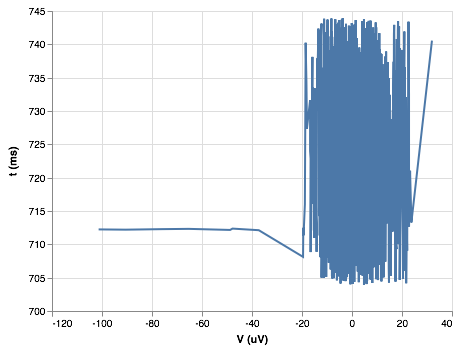

In [9]:
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q',scale=alt.Scale(zero=False)),
        x=alt.Y('V (uV):Q',title='V (uV)')
    )
# line 连接的方向也要变，竖着连/横着连

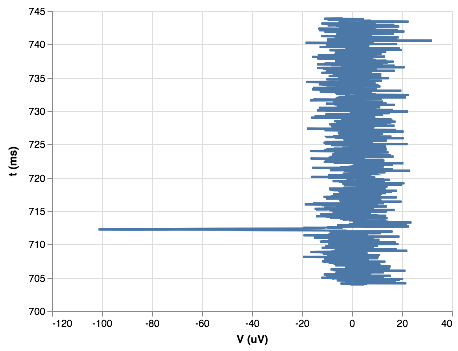

In [15]:
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q',scale=alt.Scale(zero=False)),
        x=alt.Y('V (uV):Q',title='V (uV)'),
        order=alt.Order('t (ms):Q', sort='ascending')
    )


In [14]:
## smooth plot

# The x-values we want
x= np.linspace(-15,15,400)  # ?np.arange

# normalize
norm_I = 4*(scipy.special.j1(x)/x)**2

In [16]:
df_airy=pd.DataFrame(data={'x':x,
                          'norm_I':norm_I})   # dict -> column headinf
df_airy.head()

,x,norm_I
0,-15.000000,0.000748
1,-14.924812,0.000767
2,-14.849624,0.000777
3,-14.774436,0.000779
4,-14.699248,0.000772


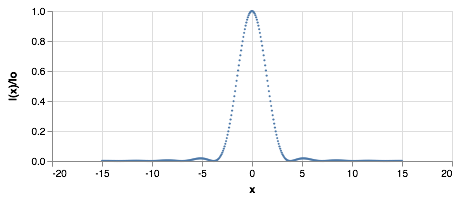

In [27]:
alt.Chart(df_airy,
    height=150
    ).mark_point(
        size=5,
        filled=True,
        opacity=1
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q',title='I(x)/Io'),
        order='x:Q')

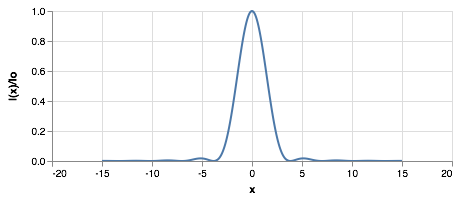

In [22]:
alt.Chart(df_airy,
    height=150
    ).mark_line(
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q',title='I(x)/Io'),
    order='x:Q')

In [26]:
df=pd.read_csv('data/gfmt_sleep.csv',comment='#')
df['insomnia']=df['sci']<=16

In [28]:
bootcamp_utils.ecdf_y??
# .rank() just do the thing!

Signature: bootcamp_utils.ecdf_y(data)
Source:   
def ecdf_y(data):
    """Give y-values of an ECDF for an unsorted column in a data frame.
    
    Parameters
    ----------
    data : Pandas Series
        Series (or column of a DataFrame) from which to generate ECDF
        values

    Returns
    -------
    output : Pandas Series
        Corresponding y-values for an ECDF when plotted with dots.

    Notes
    -----
    .. This only works for plotting an ECDF with points, not for formal
       ECDFs
    """
    return data.rank(method='first') / len(data)
File:      ~/git/bootcamp/modules/bootcamp_utils/bootcamp_utils/viz.py
Type:      function


In [29]:
grouped=df.groupby('insomnia')
df['percent correct ecdf_y grouped by insomnia']=(grouped['percent correct'].transform(bootcamp_utils.ecdf_y))

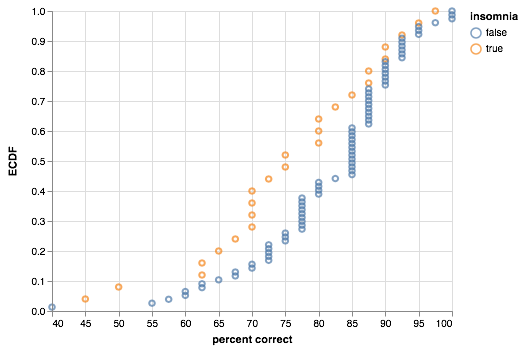

In [31]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('percent correct:Q',scale=alt.Scale(zero=False)),
        y=alt.Y('percent correct ecdf_y grouped by insomnia:Q',
               title='ECDF'),
color='insomnia:N')

In [ ]:
df_ecdf=bootcamp_utils.ecdf_dataframe(df,'percent correct',color='insomnia',formal=True)
df_ecdf.head()